FlexField Fitness vs Pulsegear

In [2]:
import pandas as pd                                                       # data manipulation and analysis
import numpy as np                                                        # numerical computations and array operations
import seaborn as sns                                                     # statistical data visualization
import matplotlib.pyplot as plt                                           # creating plots and visualizations
from sklearn.model_selection import train_test_split, cross_val_score     # splitting data and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder           # preprocessing tools for scaling and encoding
from sklearn.impute import SimpleImputer                                  # preprossessing tools for handling missing values
from sklearn.linear_model import LinearRegression                         # regression analysis
!pip install tensorflow                                              # neural network
from sklearn.neighbors import KNeighborsRegressor                         # knn model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error                            # used for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error

Read Data

In [ ]:
fitness = pd.read_csv('flexfield_fitness.csv')
fitness.head(3)

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
0,221958,Female,27,7.3,Build muscle,4,NaN
1,771155,Female,24,6.2,Endurance training,4,2173.0
2,231932,Male,22,7.4,Fat loss,2,1752.0


In [ ]:
fitness.describe()

,Customer ID,Age,Hours at Gym (per week),Gym Membership Length (years),Calorie Intake
count,1000.000000,1000.000000,935.000000,1000.000000,961.000000
mean,538112.094000,27.127000,6.148663,2.507000,2295.334027
std,262574.257707,5.017773,1.283104,1.652477,437.179461
min,100404.000000,18.000000,3.000000,0.000000,1500.000000
25%,301536.000000,23.000000,5.300000,1.000000,1922.000000
50%,538556.500000,27.000000,6.100000,2.000000,2321.000000
75%,762517.000000,31.000000,7.100000,4.000000,2686.000000
max,999684.000000,44.000000,10.300000,7.000000,2997.000000


In [5]:
pulsegear = pd.read_csv('pulsegear.csv')

In [ ]:
pulsegear.describe()

,Customer ID,Age,Hours at Gym (per week),Average Spend on Apparel ($/year)
count,1000.000000,1000.000000,935.000000,1000.00000
mean,538112.094000,27.127000,6.148663,700.07309
std,262574.257707,5.017773,1.283104,191.33611
min,100404.000000,18.000000,3.000000,0.00000
25%,301536.000000,23.000000,5.300000,585.00500
50%,538556.500000,27.000000,6.100000,713.31500
75%,762517.000000,31.000000,7.100000,836.90500
max,999684.000000,44.000000,10.300000,1152.37000


Data Wrangling

Assume that null value in Hours at Gym (per week) means people don't go to gym (hours = 0) so there is no info. Same with pulsegear data.

In [ ]:
fitness['Hours at Gym (per week)'] = fitness['Hours at Gym (per week)'].fillna(0)
fitness.describe()

,Customer ID,Age,Hours at Gym (per week),Gym Membership Length (years),Calorie Intake
count,1000.000000,1000.000000,1000.000000,1000.000000,961.000000
mean,538112.094000,27.127000,5.749000,2.507000,2295.334027
std,262574.257707,5.017773,1.959387,1.652477,437.179461
min,100404.000000,18.000000,0.000000,0.000000,1500.000000
25%,301536.000000,23.000000,5.000000,1.000000,1922.000000
50%,538556.500000,27.000000,6.000000,2.000000,2321.000000
75%,762517.000000,31.000000,7.000000,4.000000,2686.000000
max,999684.000000,44.000000,10.300000,7.000000,2997.000000


In [ ]:
fitness = fitness.dropna(how='any',axis=0)
fitness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 1 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    961 non-null    int64  
 1   Gender                         961 non-null    object 
 2   Age                            961 non-null    int64  
 3   Hours at Gym (per week)        961 non-null    float64
 4   Fitness Goal                   961 non-null    object 
 5   Gym Membership Length (years)  961 non-null    int64  
 6   Calorie Intake                 961 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.1+ KB


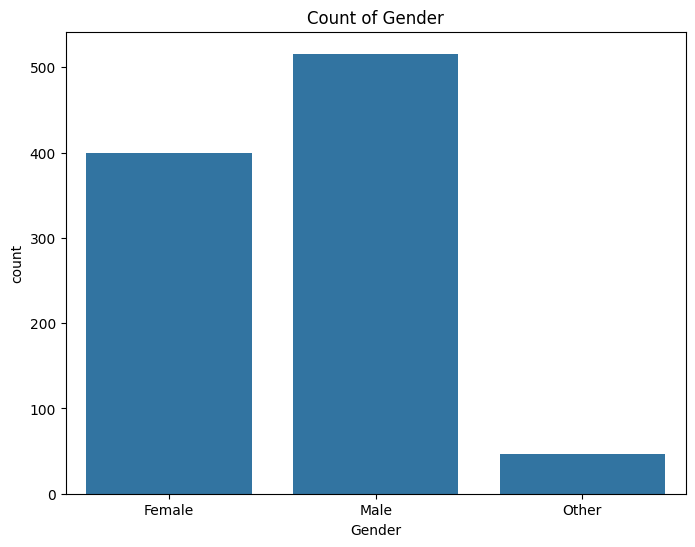

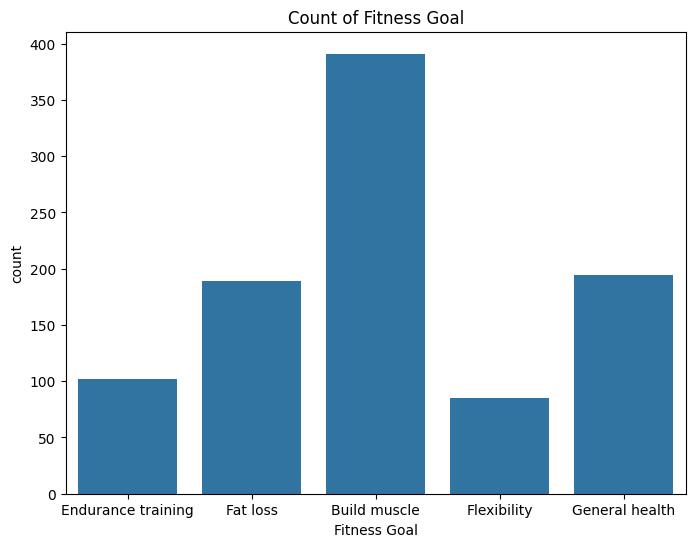

In [ ]:
categorical_columns = fitness.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=fitness)
    plt.title(f'Count of {column}')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

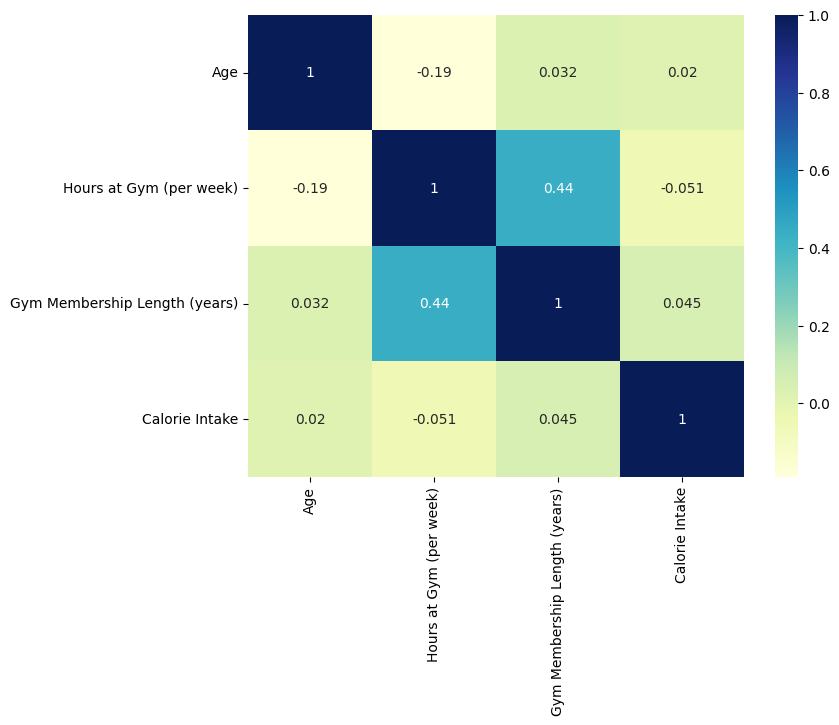

In [ ]:
numerical_cols_fitness = ['Age', 'Hours at Gym (per week)', 'Gym Membership Length (years)', 'Calorie Intake']
plt.figure(figsize=(8,6))
sns.heatmap(fitness[numerical_cols_fitness].corr(),cmap='YlGnBu',annot=True)
plt.show

In [11]:
pulsegear['Hours at Gym (per week)'] = pulsegear['Hours at Gym (per week)'].fillna(0)
pulsegear.describe()

,Customer ID,Age,Hours at Gym (per week),Average Spend on Apparel ($/year)
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,538112.094000,27.127000,5.749000,700.07309
std,262574.257707,5.017773,1.959387,191.33611
min,100404.000000,18.000000,0.000000,0.00000
25%,301536.000000,23.000000,5.000000,585.00500
50%,538556.500000,27.000000,6.000000,713.31500
75%,762517.000000,31.000000,7.000000,836.90500
max,999684.000000,44.000000,10.300000,1152.37000


In [ ]:
pulsegear = pulsegear.dropna(how='any', axis=0)
pulsegear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        952 non-null    int64  
 1   Gender                             952 non-null    object 
 2   Age                                952 non-null    int64  
 3   Hours at Gym (per week)            952 non-null    float64
 4   Fitness Goal                       952 non-null    object 
 5   Average Spend on Apparel ($/year)  952 non-null    float64
 6   Type of Apparel Purchased          952 non-null    object 
 7   Primary Apparel Purchase Channel   952 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 66.9+ KB


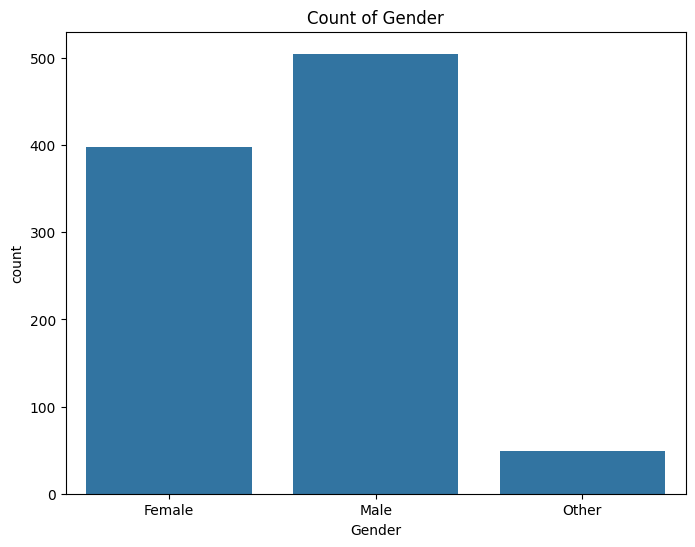

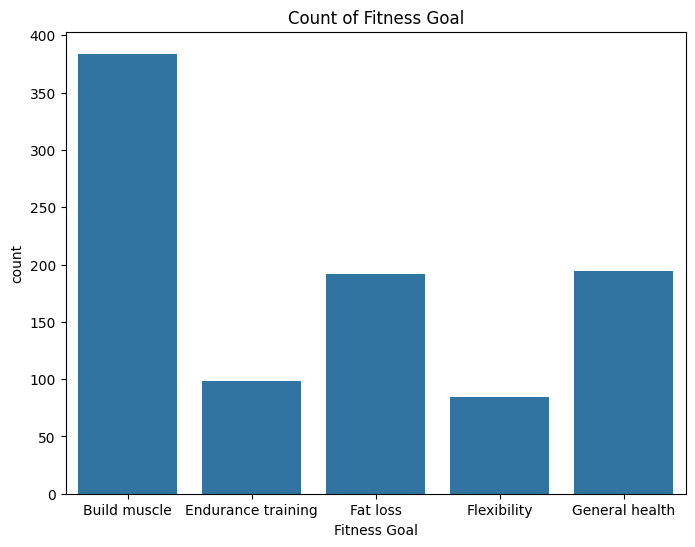

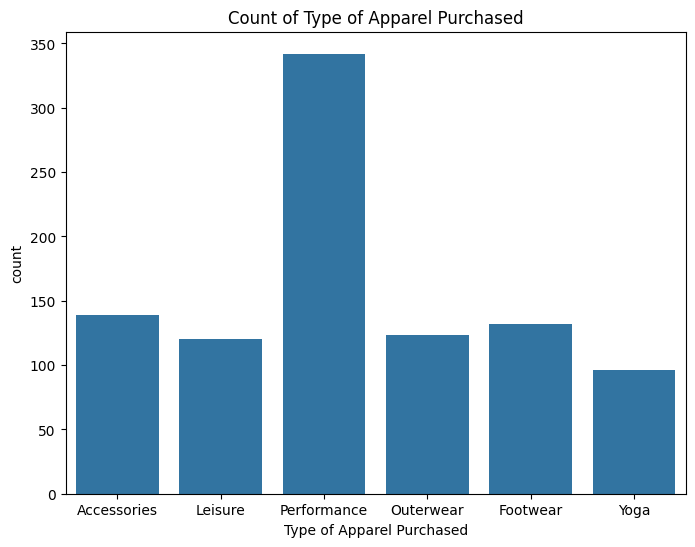

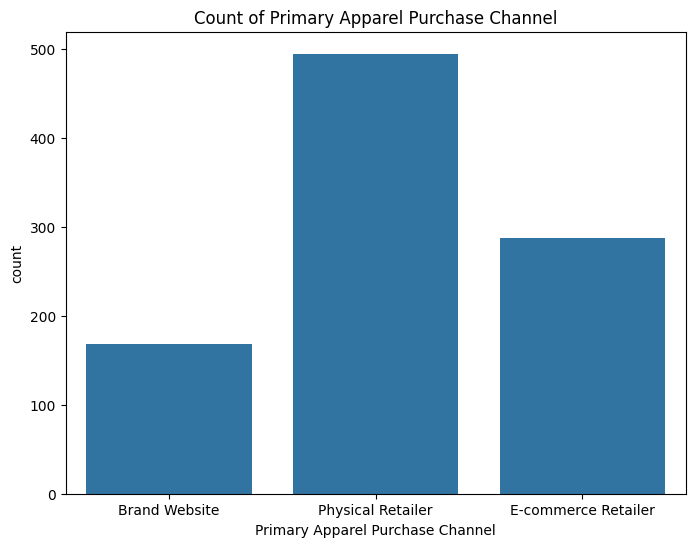

In [ ]:
categorical_columns = pulsegear.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=pulsegear)
    plt.title(f'Count of {column}')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

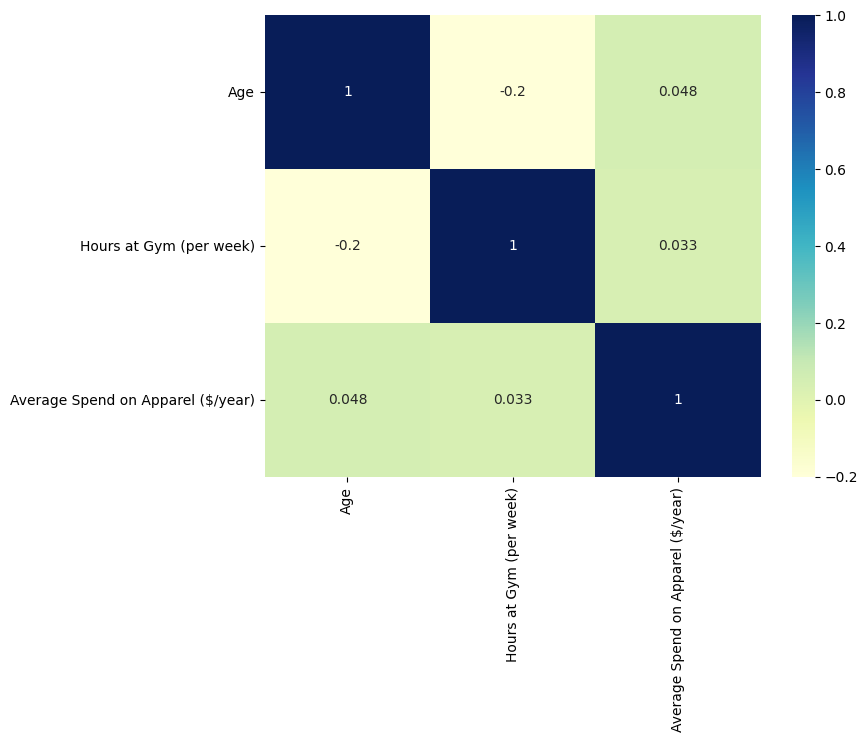

In [ ]:
numerical_cols_pulsegear = ['Age', 'Hours at Gym (per week)', 'Average Spend on Apparel ($/year)']
plt.figure(figsize=(8,6))
sns.heatmap(pulsegear[numerical_cols_pulsegear].corr(),cmap='YlGnBu',annot=True)
plt.show

Merge datasets based on common columns

In [ ]:
merged_data = pd.merge(fitness, pulsegear, on = ['Customer ID', 'Gender', 'Age', 'Hours at Gym (per week)', 'Fitness Goal'], how = 'inner')
merged_data.head(3)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        913 non-null    int64  
 1   Gender                             913 non-null    object 
 2   Age                                913 non-null    int64  
 3   Hours at Gym (per week)            913 non-null    float64
 4   Fitness Goal                       913 non-null    object 
 5   Gym Membership Length (years)      913 non-null    int64  
 6   Calorie Intake                     913 non-null    float64
 7   Average Spend on Apparel ($/year)  913 non-null    float64
 8   Type of Apparel Purchased          913 non-null    object 
 9   Primary Apparel Purchase Channel   913 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 71.5+ KB


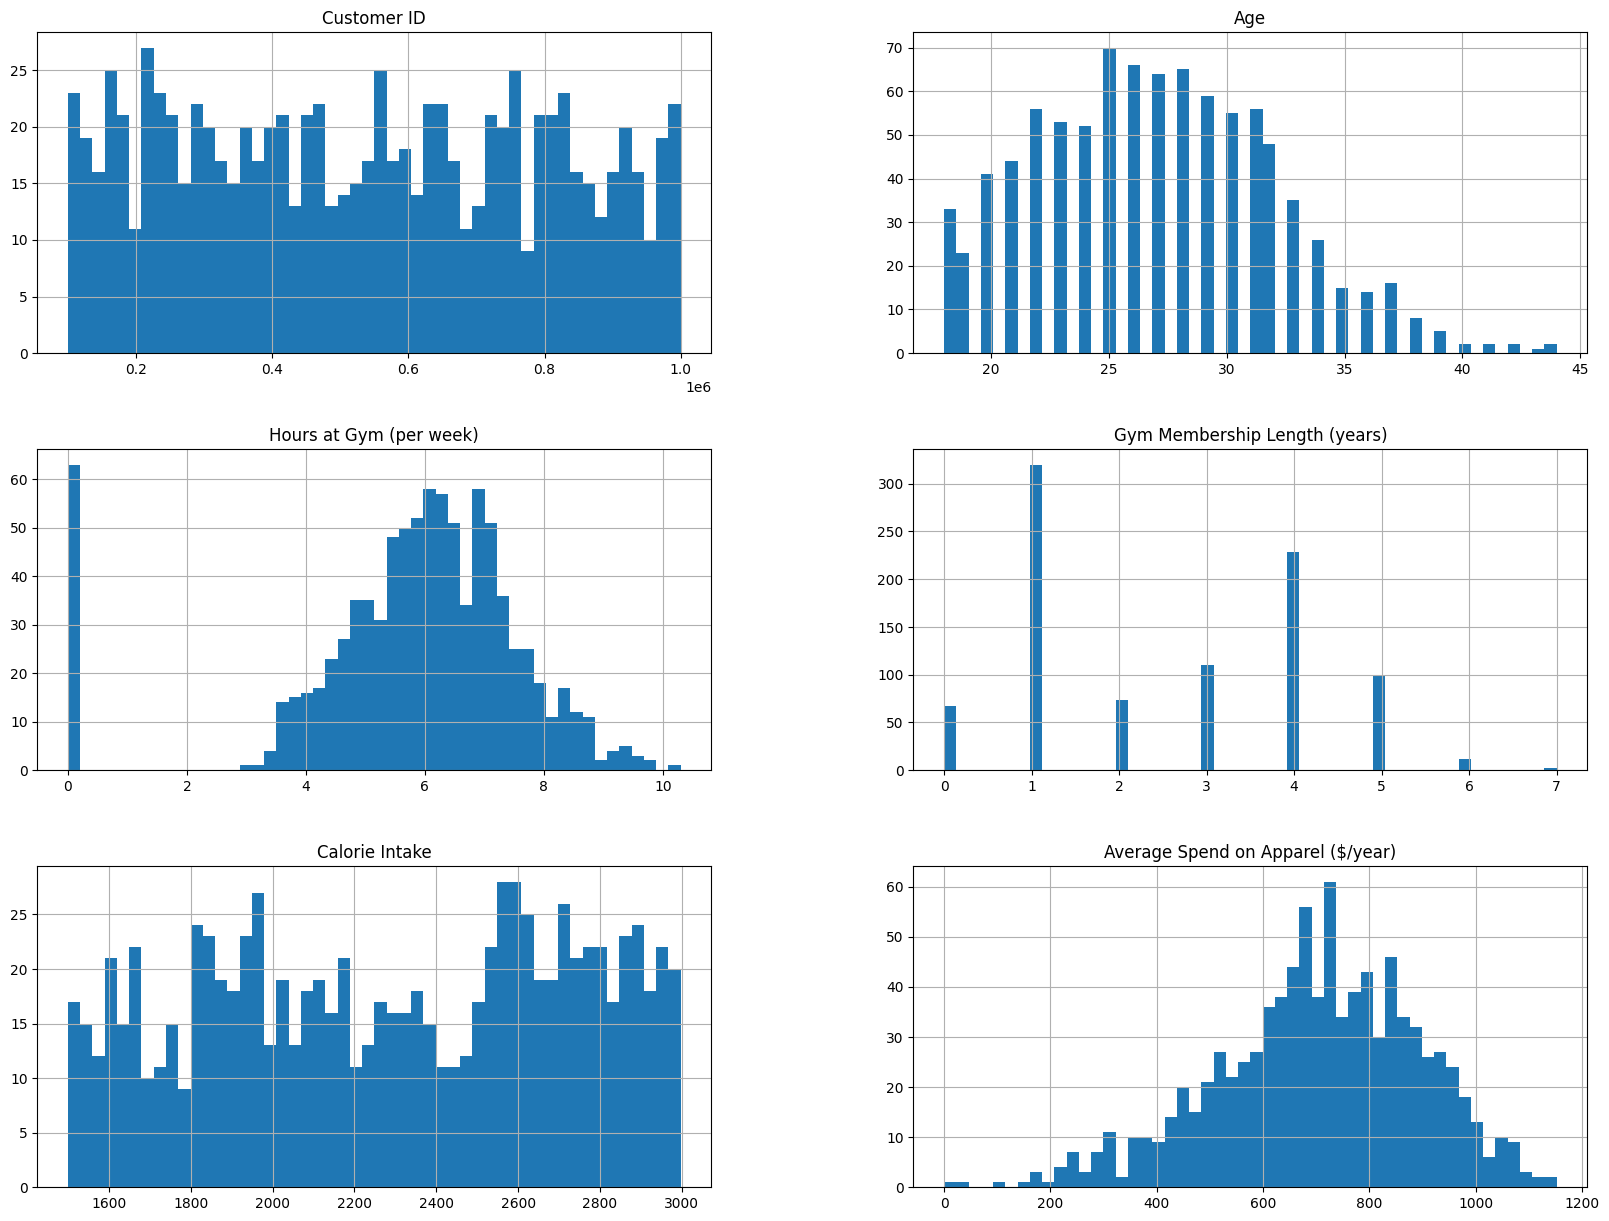

In [16]:
merged_data.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=goal_membership_length.index, y=goal_membership_length.values)
plt.title('Average Gym Membership Length by Fitness Goal')
plt.xlabel('Fitness Goal')
plt.ylabel('Average Membership Length (years)')
plt.xticks(rotation=45)
plt.show()

NameError: name 'goal_membership_length' is not defined

<Figure size 1000x600 with 0 Axes>

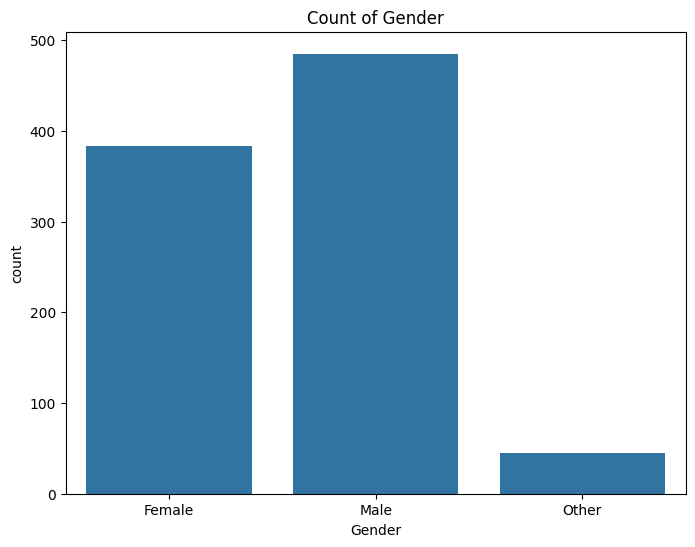

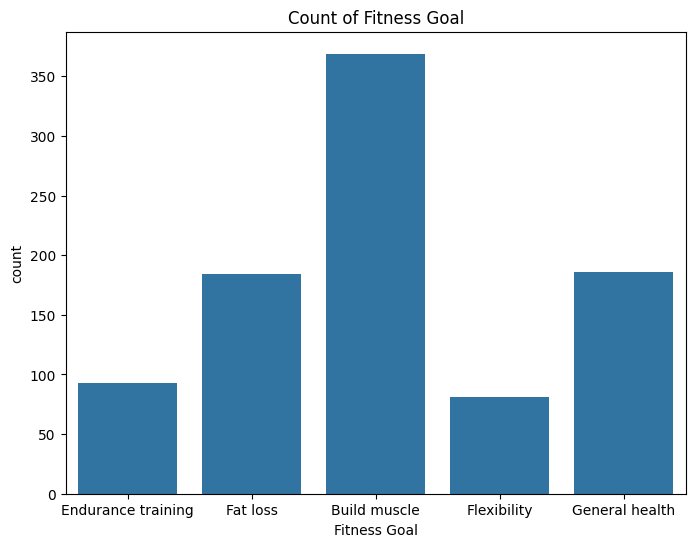

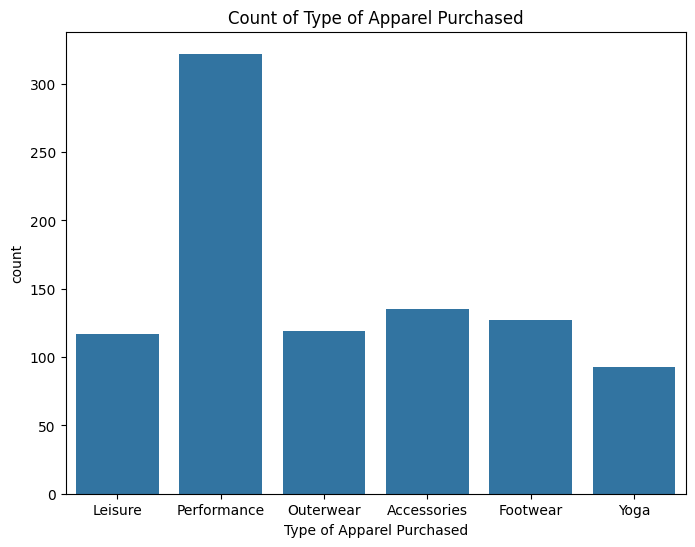

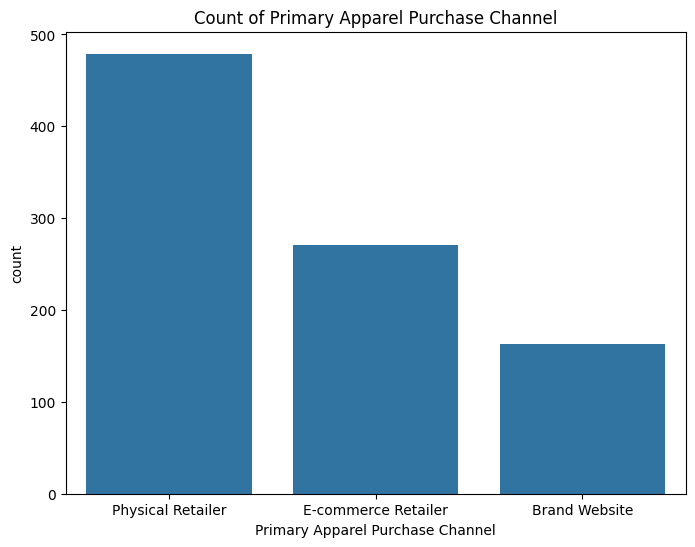

In [18]:
categorical_columns = merged_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=merged_data)
    plt.title(f'Count of {column}')
    plt.show()

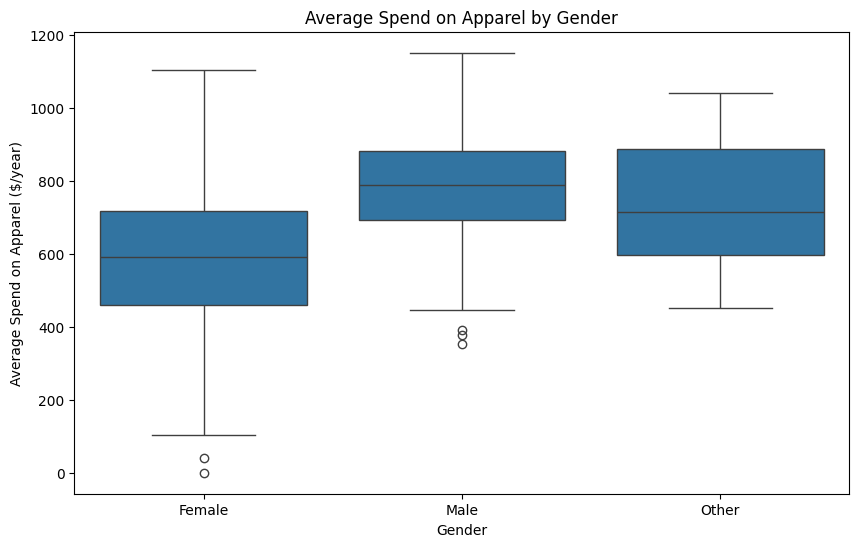

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Gender', y='Average Spend on Apparel ($/year)')
plt.title('Average Spend on Apparel by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spend on Apparel ($/year)')
plt.show()

In [58]:
# Convert categorical variables to dummy variables
merged_data_encoded = pd.get_dummies(merged_data, drop_first=True)

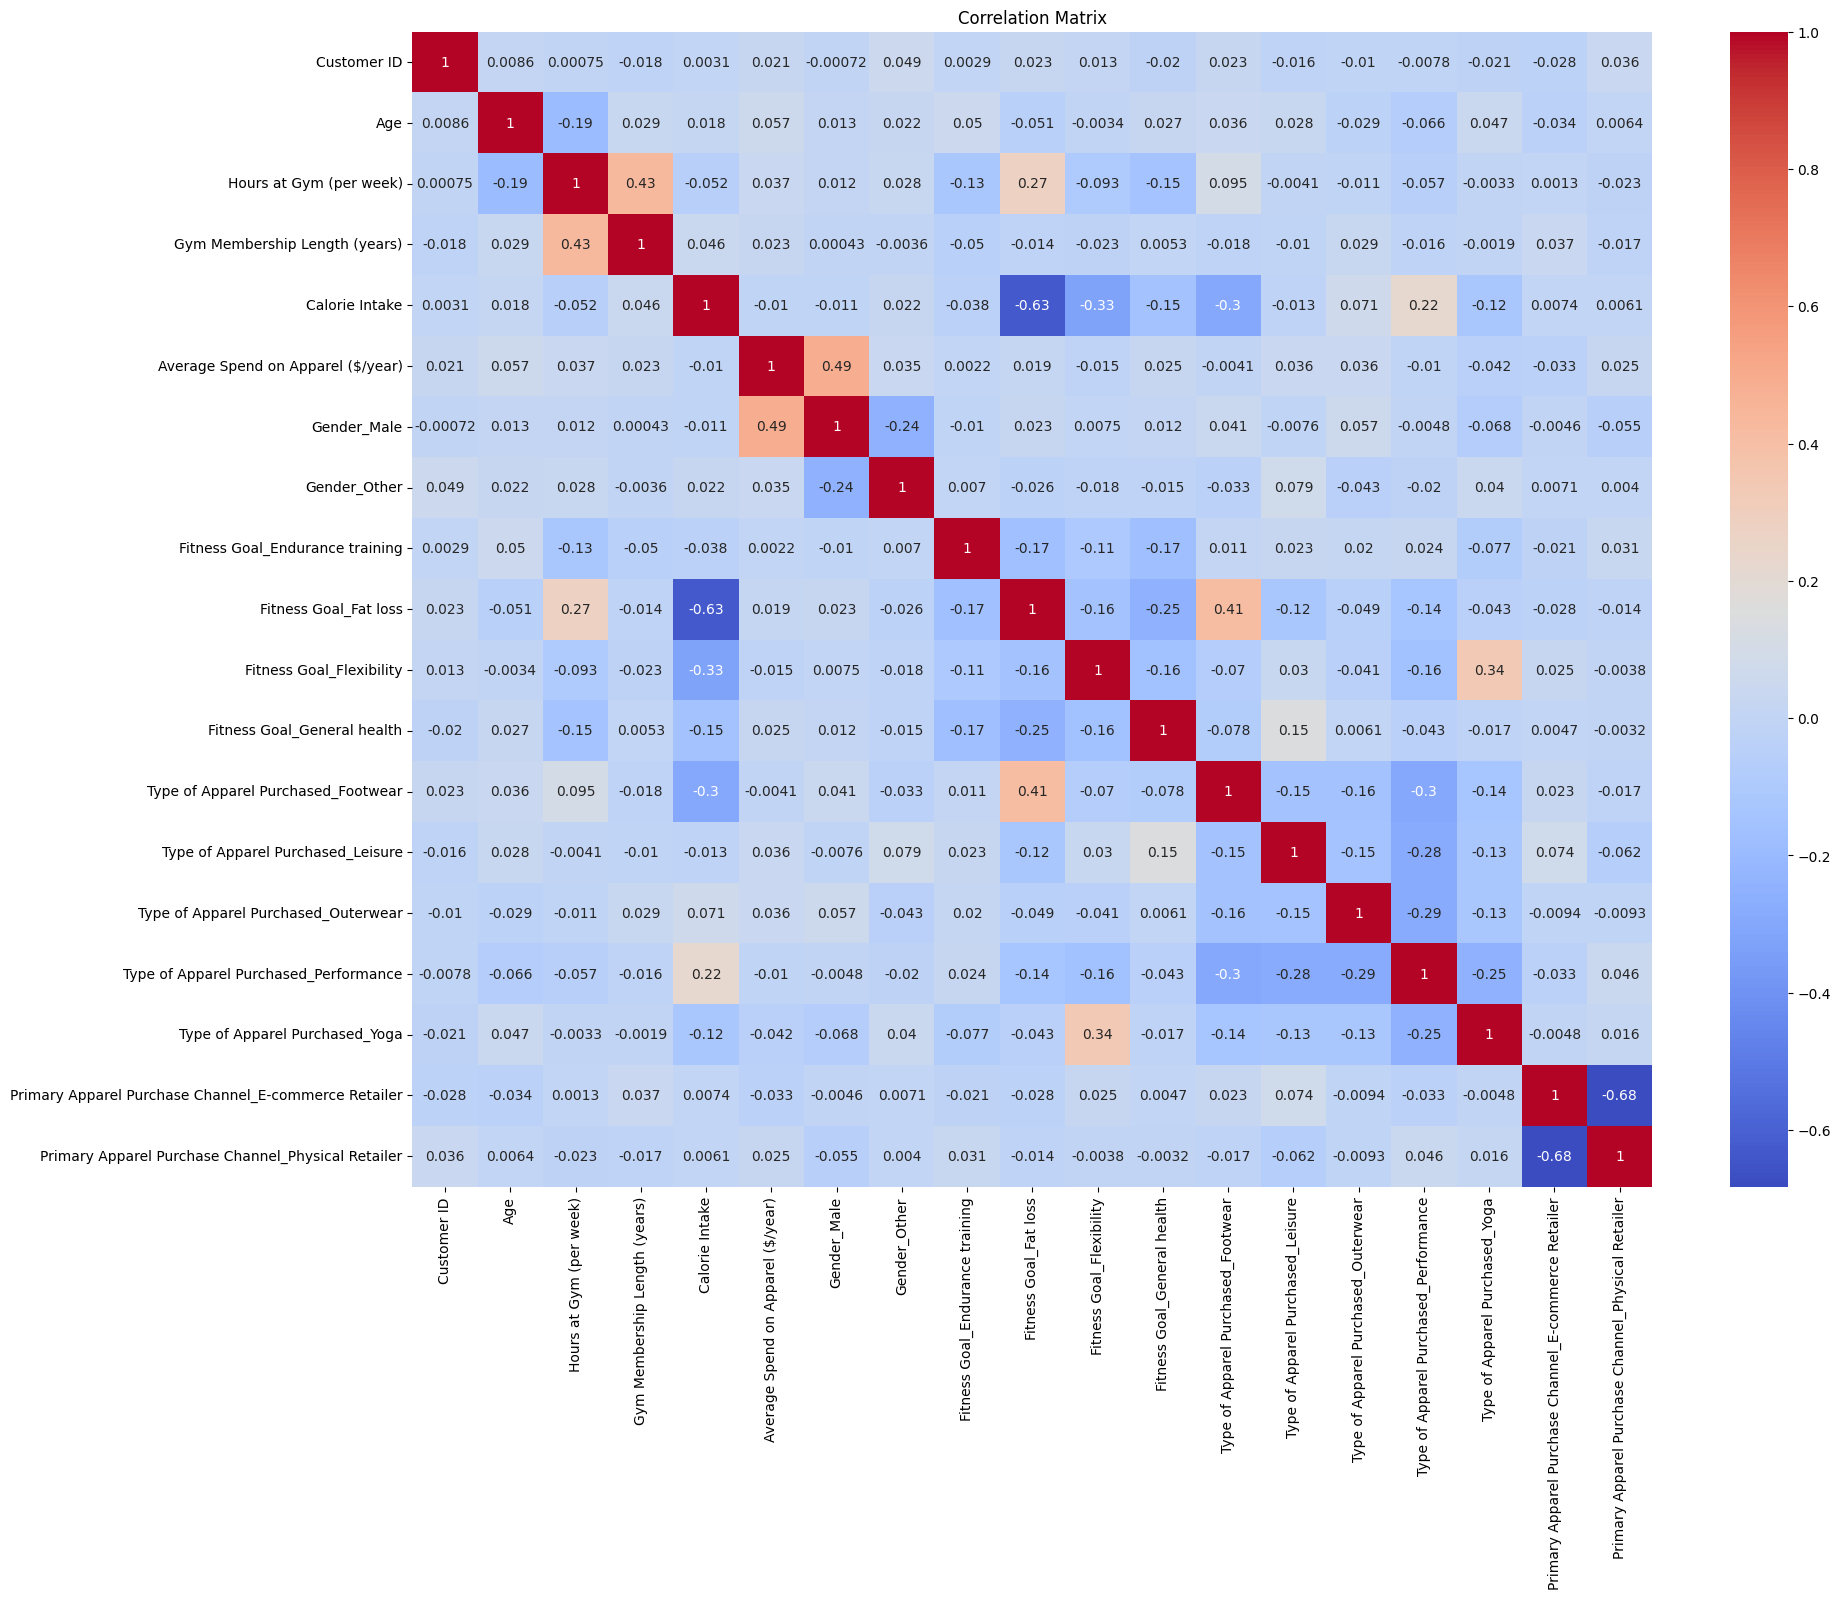

In [63]:
correlation_matrix = merged_data_encoded.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

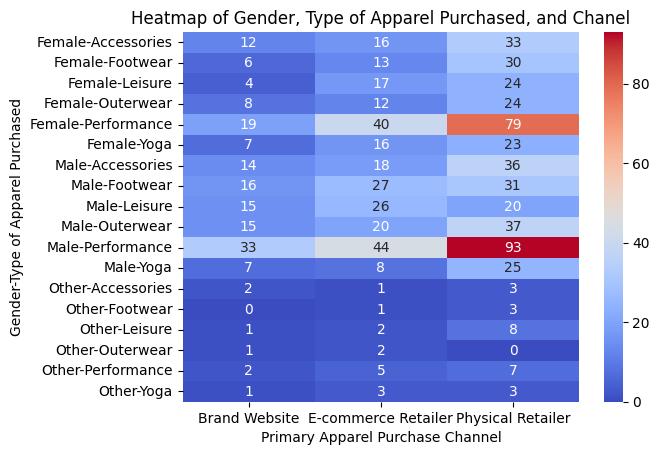

In [68]:
ct = pd.crosstab([merged_data['Gender'], merged_data['Type of Apparel Purchased']], merged_data['Primary Apparel Purchase Channel'])

sns.heatmap(ct, annot=True, cmap='coolwarm')
plt.title('Heatmap of Gender, Type of Apparel Purchased, and Chanel')
plt.show()

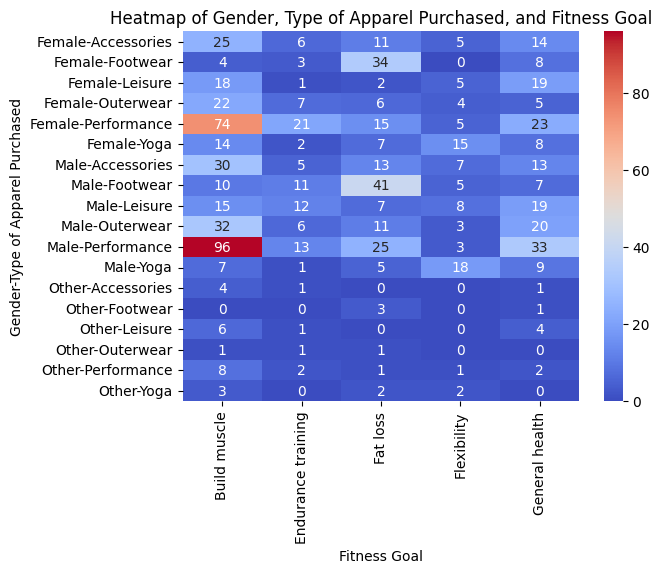

In [20]:
ct = pd.crosstab([merged_data['Gender'], merged_data['Type of Apparel Purchased']], merged_data['Fitness Goal'])

sns.heatmap(ct, annot=True, cmap='coolwarm')
plt.title('Heatmap of Gender, Type of Apparel Purchased, and Fitness Goal')
plt.show()

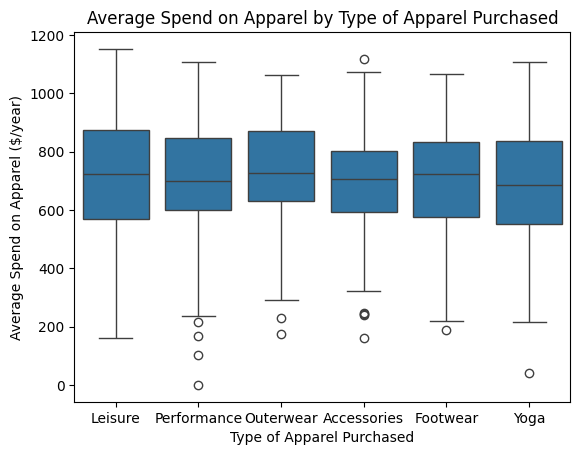

In [21]:
sns.boxplot(x='Type of Apparel Purchased', y='Average Spend on Apparel ($/year)', data=merged_data)
plt.title('Average Spend on Apparel by Type of Apparel Purchased')
plt.show()

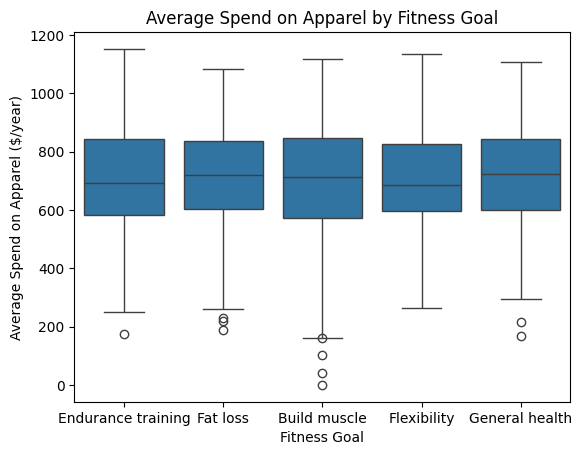

In [22]:
sns.boxplot(x='Fitness Goal', y='Average Spend on Apparel ($/year)', data=merged_data)
plt.title('Average Spend on Apparel by Fitness Goal')
plt.show()

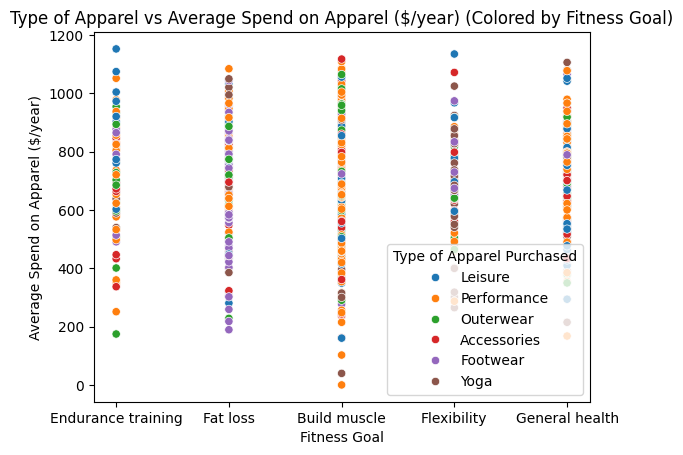

In [47]:
sns.scatterplot(data=merged_data, x='Fitness Goal', y='Average Spend on Apparel ($/year)', hue='Type of Apparel Purchased')
plt.title('Type of Apparel vs Average Spend on Apparel ($/year) (Colored by Fitness Goal)')
plt.show()

Linear Regression

In [76]:
# Ensure statsmodels is installed
!pip install statsmodels

# Import necessary libraries
import pandas as pd
import statsmodels.formula.api as smf

# Define the formula for linear regression
formula = 'Q("Average Spend on Apparel ($/year)") ~ Q("Hours at Gym (per week)") + Q("Gym Membership Length (years)") + Q("Calorie Intake") + C(Q("Fitness Goal")) + C(Q("Gender"))'

# Fit the linear regression model
model = smf.ols(formula=formula, data=merged_data).fit()
print(model.summary())


7074.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


                                      OLS Regression Results                                      
Dep. Variable:     Q("Average Spend on Apparel ($/year)")   R-squared:                       0.265
Model:                                                OLS   Adj. R-squared:                  0.258
Method:                                     Least Squares   F-statistic:                     36.16
Date:                                    Fri, 25 Oct 2024   Prob (F-statistic):           7.57e-55
Time:                                            23:57:45   Log-Likelihood:                -5956.4
No. Observations:                                     913   AIC:                         1.193e+04
Df Residuals:                                         903   BIC:                         1.198e+04
Df Model:                                               9                                         
Covariance Type:                                nonrobust                                         
          

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Assuming merged_data is your DataFrame containing the necessary columns

# Define spending categories based on Average Spend on Apparel
spending_bins = [0, 400, 800, 1200]  # Updated spending ranges
spending_labels = ['Low', 'Medium', 'High']

# Create a new column for spending category
merged_data['Spending Category'] = pd.cut(merged_data['Average Spend on Apparel ($/year)'], 
                                           bins=spending_bins, 
                                           labels=spending_labels, 
                                           include_lowest=True)

# Define gym engagement categories based on Hours at Gym (per week)
gym_bins = [0, 3, 6, 9, float('inf')]  # Updated gym hour ranges
gym_labels = ['Rarely', 'Occasionally', 'Frequently', 'Very Frequently']

# Create a new column for gym engagement category
merged_data['Gym Engagement'] = pd.cut(merged_data['Hours at Gym (per week)'], 
                                        bins=gym_bins, 
                                        labels=gym_labels, 
                                        include_lowest=True)

# Display the resulting DataFrame with the new categories
print(merged_data[['Average Spend on Apparel ($/year)', 'Hours at Gym (per week)', 
                   'Spending Category', 'Gym Engagement']].head())

# Create a cross-tabulation to analyze the relationship
segmentation_analysis = pd.crosstab(merged_data['Spending Category'], merged_data['Gym Engagement'])


   Average Spend on Apparel ($/year)  Hours at Gym (per week)  \
0                             659.13                      6.2   
1                             761.12                      7.4   
2                             234.87                      6.0   
3                             539.69                      9.3   
4                             818.03                      5.7   

  Spending Category   Gym Engagement  
0            Medium       Frequently  
1            Medium       Frequently  
2               Low     Occasionally  
3            Medium  Very Frequently  
4              High     Occasionally  


Gym Engagement     Rarely  Occasionally  Frequently  Very Frequently
Spending Category                                                   
Low                     4            30          31                0
Medium                 45           233         266                9
High                   15           133         141                6


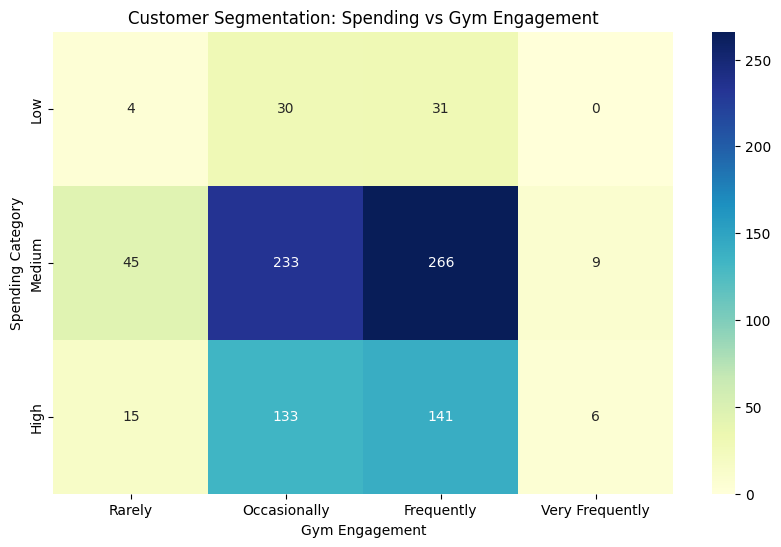

In [85]:
# Display the analysis
print(segmentation_analysis)

# Visualize the segmentation analysis using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(segmentation_analysis, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Customer Segmentation: Spending vs Gym Engagement')
plt.xlabel('Gym Engagement')
plt.ylabel('Spending Category')
plt.show()

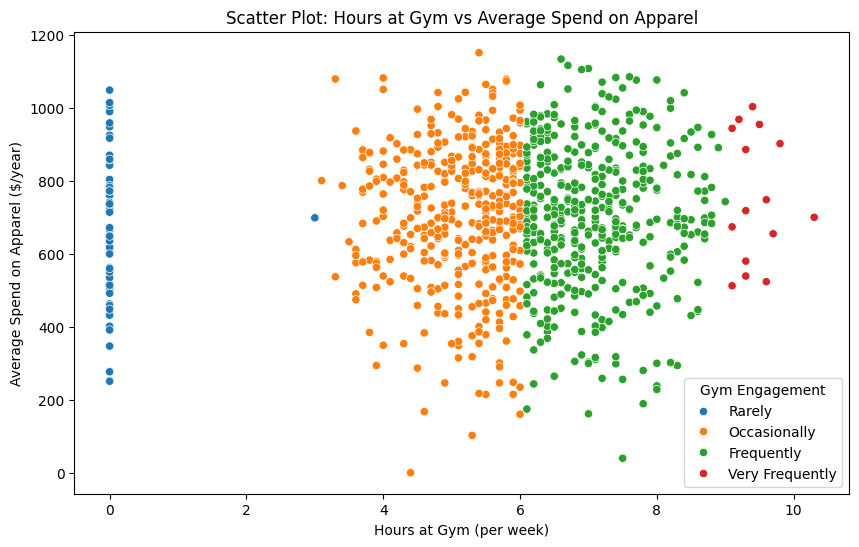

In [93]:
# Scatter plot to visualize relationship between Hours at Gym and Average Spend on Apparel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Hours at Gym (per week)', y='Average Spend on Apparel ($/year)', hue='Gym Engagement')
plt.title('Scatter Plot: Hours at Gym vs Average Spend on Apparel')
plt.xlabel('Hours at Gym (per week)')
plt.ylabel('Average Spend on Apparel ($/year)')
plt.show()

Random Forest

In [91]:
# Encoding categorical features for Random Forest
from sklearn.preprocessing import LabelEncoder

le_spending = LabelEncoder()
merged_data['Spending Category Encoded'] = le_spending.fit_transform(merged_data['Spending Category'])

le_gym = LabelEncoder()
merged_data['Gym Engagement Encoded'] = le_gym.fit_transform(merged_data['Gym Engagement'])

# Random Forest Classifier
# Features and target for classification
X = merged_data[['Gym Engagement Encoded', 'Hours at Gym (per week)']]
y = merged_data['Spending Category Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.5683060109289617
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        64
           1       0.00      0.00      0.00        16
           2       0.57      0.96      0.72       103

    accuracy                           0.57       183
   macro avg       0.36      0.35      0.28       183
weighted avg       0.50      0.57      0.45       183



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
# Linear Regression
# Features and target for regression
X_reg = merged_data[['Gym Engagement Encoded', 'Hours at Gym (per week)']]
y_reg = merged_data['Average Spend on Apparel ($/year)']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

# Predictions for regression
y_pred_reg = lr.predict(X_test_reg)

# Evaluation for regression
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))


Linear Regression Mean Squared Error: 37100.30701585326
